## Hierarichal Clustering Implementation

### [Hierarchical Clustering](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
## Standardize the data 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
X_scaled.shape

(150, 4)

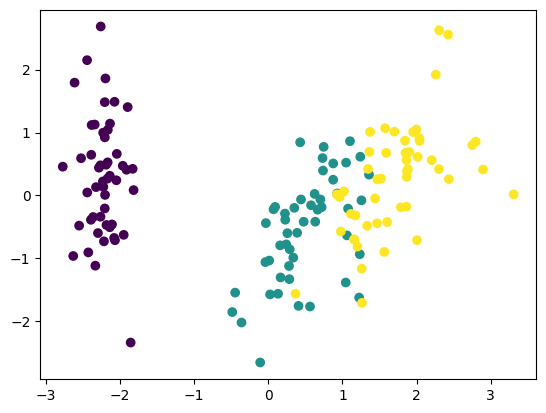

In [7]:
## apply PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=iris.target)

Text(0, 0.5, 'Euclidean Distance')

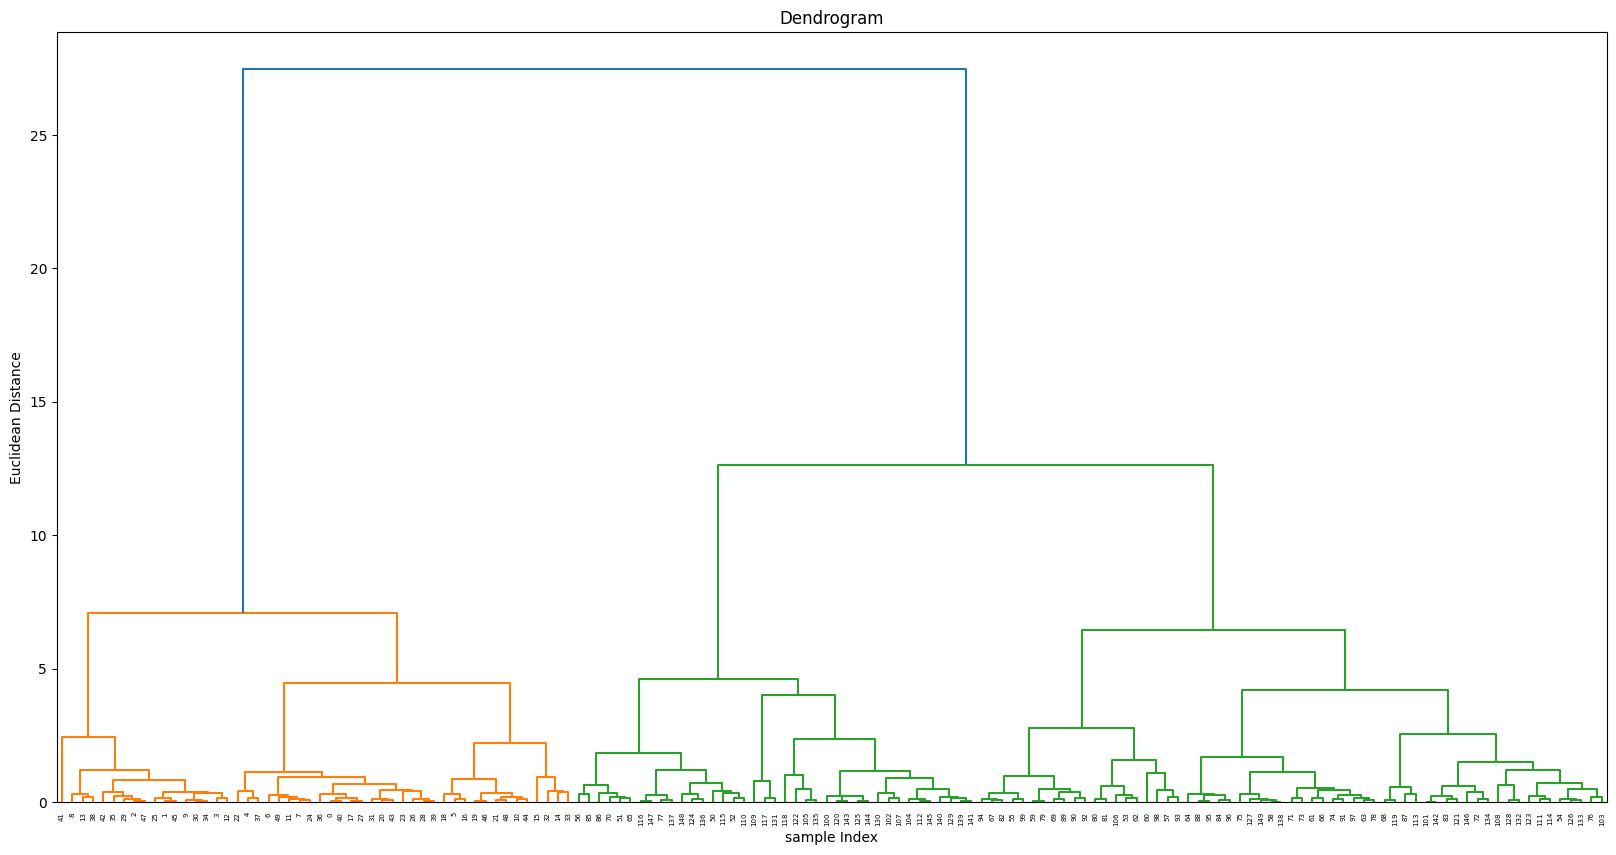

In [8]:
## Agglomerative Clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))
plt.title("Iris Dendograms")
shc.dendrogram(shc.linkage(pca_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel('sample Index')
plt.ylabel('Euclidean Distance')


In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(pca_scaled)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

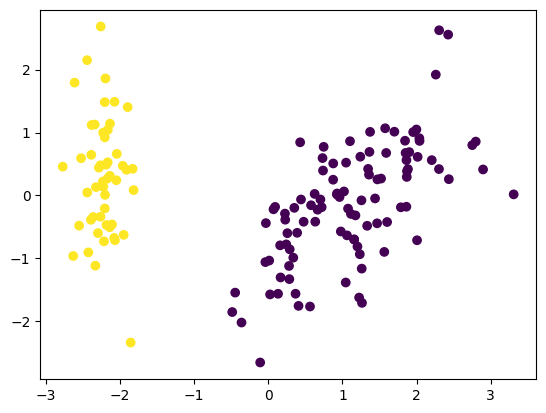

In [10]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_)

In [12]:
from sklearn.metrics import silhouette_score
silhouette_coefficient = []

for i in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    cluster.fit(X_scaled)
    score = silhouette_score(X_scaled, cluster.labels_)
    silhouette_coefficient.append(score)

silhouette_coefficient

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

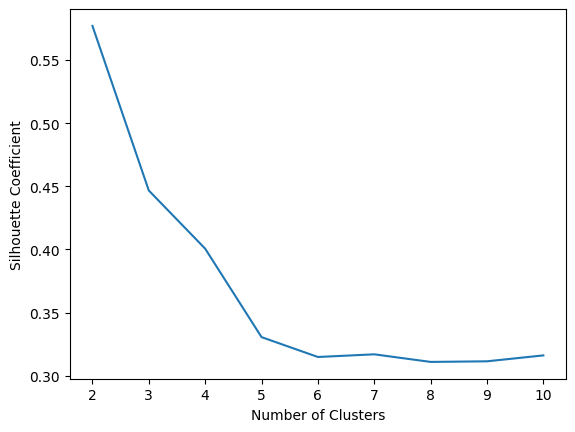

In [13]:
plt.plot(range(2, 11), silhouette_coefficient)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [14]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [15]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.4/10.6 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.6 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 4.3 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/10.6 MB 4.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.6 MB 4.4 MB/s eta 0:00:02
   --------

  You can safely remove it manually.
